Setup   

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from lib.bloom_filter import BloomFilter
from lib.linear_hash import LinearHash, HashLibFunction

m = 17
n = 100

h1 = LinearHash(1, 15, m)
h2 = LinearHash(4, 11, m)
h3 = LinearHash(7, 2, m)

Ex 1

In [2]:
bf = BloomFilter(m, [h1, h2, h3])

nums = [23, 7, 50, 91]

bf.add_all(nums)

bf.print_bit_array()

for i in range(n):
    output, real = bf.query(i)
    if output and not real:
        print(f"False positive: {i}")

Bit array: [1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 ]
False positive: 6
False positive: 16
False positive: 24
False positive: 33
False positive: 40
False positive: 41
False positive: 57
False positive: 58
False positive: 67
False positive: 74
False positive: 75
False positive: 84
False positive: 92


ex 2

In [3]:
bf.calculate_false_positive_rate(n)

Expected num zero: 8.212996858535842, Actual num zero: 9


ex 3

In [4]:
bf1 = BloomFilter(m, [h1, h2, h3])
bf2 = BloomFilter(m, [h1, h2, h3])

nums1 = [23, 7, 50, 91]
nums2 = []

ex 4

In [5]:
n = 200
s = 100
m = 1000

S1 = np.sort(random.sample(range(n), s))
S2 = np.sort(random.sample(range(n), s))

I = np.intersect1d(S1, S2)
print(len(I))

h1 = LinearHash(1, 15, m)
h2 = LinearHash(4, 11, m)
h3 = LinearHash(7, 2, m)

bf1 = BloomFilter(m, [h1, h2, h3])
bf2 = BloomFilter(m, [h1, h2, h3])

bf1.add_all(S1)
bf2.add_all(S2)

bf3 = bf1 - bf2
bf4 = bf2 - bf1

p = (1 - 1 / m) ** (3 * s)
p_star = (1 - 1 / m) ** (3 * (s - len(I)))
expected = m * (1 - p_star) * p

actual_bf3 = sum(bf3.bit_array)
actual_bf4 = sum(bf4.bit_array)

print(f"Expected: {expected}\nActual bf3: {actual_bf3}\nActual bf4: {actual_bf4}")


54
Expected: 95.52265443877565
Actual bf3: 102
Actual bf4: 95


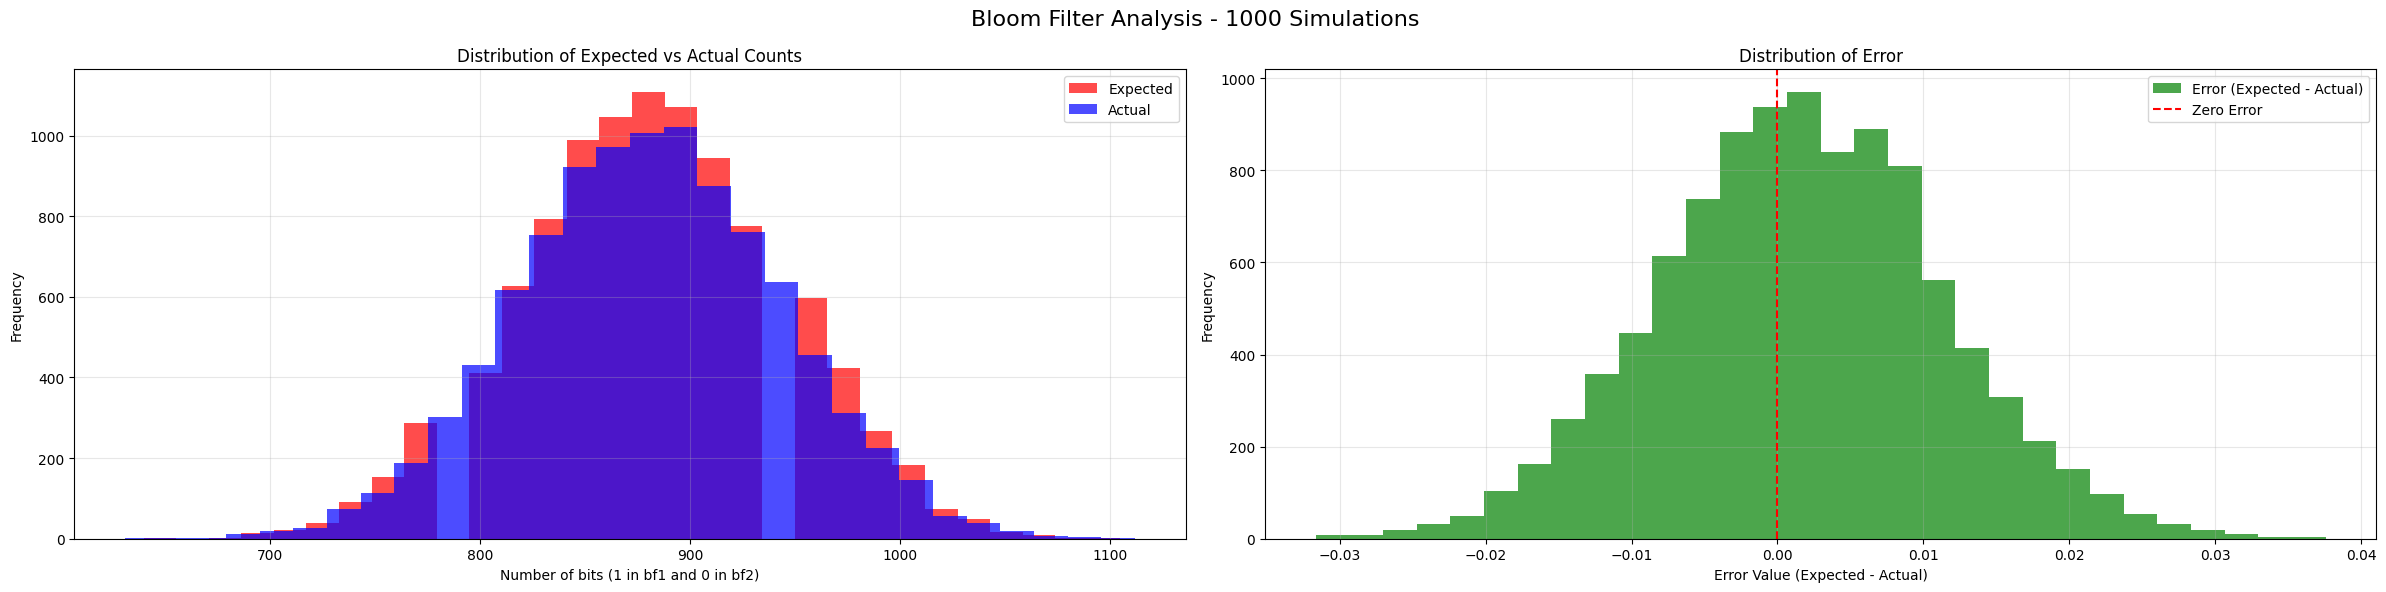

Expected count (mean): 882.12
Actual count (mean): 880.69
Expected count (std): 61.30
Actual count (std): 61.88


In [6]:
# Parameters
n = 200  # Universe size
s = 100  # Set size
m = 20000  # Bloom filter size
k = 20
num_simulations = 10000

expected_counts = []
actual_counts = []
error_rates = []

for _ in range(num_simulations):
    S1 = np.sort(random.sample(range(n), s))
    S2 = np.sort(random.sample(range(n), s))
    
    I = np.intersect1d(S1, S2)
    
    hs = [HashLibFunction(f"salt_{i}", m) for i in range(k)]
    
    bf1 = BloomFilter(m, hs)
    bf2 = BloomFilter(m, hs)
    
    bf1.add_all(S1)
    bf2.add_all(S2)
    
    bf3 = bf1 - bf2
    
    p_star = (1 - 1 / m) ** (len(hs) * (s - len(I)))
    p = (1 - 1 / m) ** (len(hs) * s)
    expected = m * (1 - p_star) * p
    
    actual = sum(bf3.bit_array)
    
    expected_counts.append(expected)
    actual_counts.append(actual)
    error_rates.append((expected - actual) / expected)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Left plot: Expected vs Actual counts
ax1.hist(expected_counts, bins=30, alpha=0.7, color='red', label='Expected')
ax1.hist(actual_counts, bins=30, alpha=0.7, color='blue', label='Actual')
ax1.set_xlabel('Number of bits (1 in bf1 and 0 in bf2)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Expected vs Actual Counts')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Error counts
ax2.hist(error_rates, bins=30, alpha=0.7, color='green', label='Error (Expected - Actual)')
ax2.set_xlabel('Error Value (Expected - Actual)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Error')
ax2.axvline(x=0, color='red', linestyle='--', label='Zero Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Bloom Filter Analysis - 1000 Simulations', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Expected count (mean): {np.mean(expected_counts):.2f}")
print(f"Actual count (mean): {np.mean(actual_counts):.2f}")
print(f"Expected count (std): {np.std(expected_counts):.2f}")
print(f"Actual count (std): {np.std(actual_counts):.2f}")
